# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

In [3]:
df.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.dtypes

user_id                  int64
timestamp       datetime64[ns]
group                   object
landing_page            object
converted                int64
dtype: object

**b.** Use the cell below to find the number of rows in the dataset.

In [5]:
num_rows = df.shape[0]
num_rows

294478

**c.** The number of unique users in the dataset.

In [6]:
df['user_id'].nunique()

290584

**d.** The proportion of users converted.

In [7]:
df.converted.mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [8]:
num_of_times = df[(df['group'] =='treatment') & (df['landing_page'] == 'old_page')].count()
num_of_times += df[(df['group'] !='treatment') & (df['landing_page'] == 'new_page')].count()
num_of_times

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

**f.** Do any of the rows have missing values?

In [9]:
print("Count total NaN in the data:", df.isnull().sum().sum())

Count total NaN in the data: 0


### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
temp_1 = df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page'))] 
temp_2 = df[((df['group'] == 'control') & (df['landing_page'] == 'old_page'))]
frames = [temp_1, temp_2]

df2 = pd.concat(frames)
df2.shape

(290585, 5)

In [11]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [12]:
df2['user_id'].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [13]:
duplicate = df2[df2.user_id.duplicated()]
 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


user_id                  timestamp      group landing_page  converted
2893   773192 2017-01-14 02:55:59.590927  treatment     new_page          0

**c.** Display the rows for the duplicate **user_id**? 

In [14]:
df[df['user_id']==773192]

user_id                  timestamp      group landing_page  converted
1899   773192 2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192 2017-01-14 02:55:59.590927  treatment     new_page          0

**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [15]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop(1899, inplace=True)
# Check again if the row with a duplicate user_id is deleted or not
duplicate = df2[df2.user_id.duplicated()]
 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [user_id, timestamp, group, landing_page, converted]
Index: []

### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

In [16]:
df2.converted.mean()

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
control_rate = df2[df2['group']== 'control'].converted.mean()
control_rate

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
treatment_rate = df2[df2['group']== 'treatment'].converted.mean()
treatment_rate

0.11880806551510564

>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. You will need that later.  

In [19]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups
obs_diff =  treatment_rate - control_rate
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [20]:
len(df2[df2['landing_page'] == 'new_page'])/len(df2.landing_page)

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>* My Answer:

we have noticed from 'a' to 'd' that:
-  the average of users on the old page was --->  0.120
-  the average of users on the new page was ---> 0.118

so the difference between the two numbers is not big so the new page did not increase the number of users.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>**My Answer:**

Null hypotheses(H0): Pold >= Pnew      (OR)      Pold - Pnew >= 0

Alternative hypotheses (H1): Pold < Pnew      (OR)      Pold - Pnew < 0

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>


**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [21]:
Pnew = df2['converted'].mean()
Pnew

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [22]:
Pold = len(df2.query('converted == 1'))/len(df2.index)
Pold

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>


In [23]:
N_new = len( df2[df2['landing_page'] == 'new_page'])
N_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [24]:
N_old = len( df2[df2['landing_page'] == 'old_page'])
N_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>


In [25]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([1,0], N_new, p=(Pold, 1-Pold))
print ("Size of new_page_converted: ",len(new_page_converted))
new_page_converted

Size of new_page_converted:  145310


array([0, 0, 0, ..., 0, 0, 0])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [26]:
# Simulate a Sample for the control Group
# Simulate a Sample for the treatment Group
old_page_converted = np.random.choice([1,0], N_old, p=(Pold, 1-Pold))
print ("Size of old_page_converted: ",len(old_page_converted))
old_page_converted

Size of old_page_converted:  145274


array([0, 0, 0, ..., 0, 0, 0])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [27]:
diff_samples = new_page_converted.mean() - old_page_converted.mean()
diff_samples

0.00070661847928658872


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [28]:
# Sampling distribution 
p_diffs = []
for _ in range (10000):
    new_page_converted = np.random.choice([1,0], N_new, p=(Pnew, 1-Pnew))
    old_page_converted = np.random.choice([1,0], N_old, p=(Pold, 1-Pold))
    diff_samp_dist = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff_samp_dist)
p_diffs

[-0.00024314178838981404,
 0.0012849896754937584,
 -0.00099319400569318483,
 0.00084417169261004343,
 -0.00022945996858646234,
 0.00010823445957328093,
 0.0011679114414620273,
 0.002317139302073154,
 -0.0016472159732158487,
 0.0019870003346422888,
 0.0005003082710782758,
 0.00032823842518826807,
 0.00039715572503196128,
 0.0017529120814549354,
 0.0014848802006603573,
 0.0009751551501643585,
 -0.00080743722388412764,
 0.0014156678714774967,
 -0.001378571863908204,
 -0.0014613176455388899,
 0.00042473424149838679,
 -0.0003805875632834077,
 0.0014914653047766319,
 0.0013814547951096212,
 0.00021822621014935817,
 -0.00084170998826858801,
 0.00043166724148278879,
 -0.00075238762938115156,
 -0.00015348176586564566,
 -1.9329443087662268e-06,
 -0.00031168220104302313,
 -7.0850244152459441e-05,
 -0.00095887349089544827,
 -0.00064889571432623361,
 0.00035577430735711513,
 0.00089266005820337613,
 0.00078961495058693654,
 0.00025932794683217186,
 0.0019113512686986939,
 -0.0017848271691840029,
 -

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  


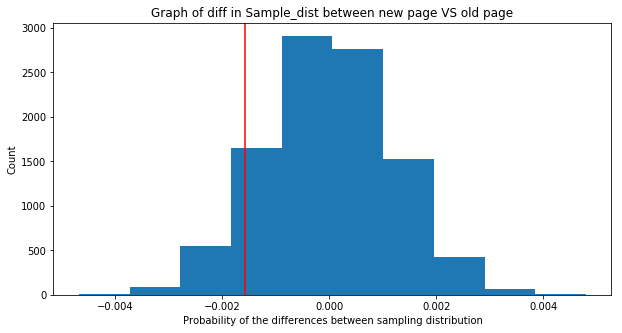

In [29]:
plt.figure(figsize=(10, 5))
plt.hist(p_diffs)

plt.xlabel('Probability of the differences between sampling distribution')
plt.ylabel('Count')
plt.title('Graph of diff in Sample_dist between new page VS old page');
plt.legend()

# under the Null 
plt.axvline(x=obs_diff, color='r')
plt.show()

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [30]:
(p_diffs > obs_diff).mean()

0.9032

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>**My Answer: **

- in part j --> I Calculated the proportion of the p_diffs (from sampling dist) against the observed diff that we calculate from the original data, and I found that the p_diffs are greater than the obs_diff by about 9.4%.


- This value is called the p-value, and it is the probability of observing our statistic or a more extreme statistic from the null hypothesis.


- I found the p-value more than 0.05, which means we do not have evidence to reject the null hypothesis, which means the new page is not better than the old page.




**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [31]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2.query('landing_page == "old_page" & converted == 1'))


# number of conversions with the new_page
convert_new = len(df2.query('landing_page == "new_page" & converted == 1'))


# number of individuals who were shown the old_page
n_old = len(df2[df2['landing_page']=="old_page"])

# number of individuals who received new_page
n_new = len(df2[df2['landing_page']=="new_page"])



/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [32]:
print(" convert_old:",convert_old,"\n","convert_new:",convert_new,'\n','n_old:', n_old,'\n','n_new:',n_new)

 convert_old: 17489 
 convert_new: 17264 
 n_old: 145274 
 n_new: 145310


In [33]:
import statsmodels.api as sm
#Computing z_score and p_value
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old],alternative='larger')

z_score,p_value

(-1.3109241984234394, 0.90505831275902449)

**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

> We need to Compare the significance of our z_score on conversion with the critical value of 95% confidence

In [34]:
from scipy.stats import norm
# find how the significant of our z_score on conversion
norm.cdf(z_score) 

0.094941687240975514

In [35]:
# 95% confidence
norm.ppf(1-(0.05))

1.6448536269514722

>**My Answer: **

What is clear is that the z-score is less than the critical value of 95% confidence so we fail to reject the null hypothesis

Therefore the conclusion is same as part j that we accept null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**My Answer:**

Because we only have two classes (conversion or no conversion), so we must use a binary classification (logistic regression).


**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [36]:
# create intercept column 
df2['intercept'] = 1

# convert the "group" column to dummy variables
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.tail()

user_id                  timestamp    group landing_page  converted  \
294471   718310 2017-01-21 22:44:20.378320  control     old_page          0   
294473   751197 2017-01-03 22:28:38.630509  control     old_page          0   
294474   945152 2017-01-12 00:51:57.078372  control     old_page          0   
294475   734608 2017-01-22 11:45:03.439544  control     old_page          0   
294476   697314 2017-01-15 01:20:28.957438  control     old_page          0   

        intercept  ab_page  
294471          1        0  
294473          1        0  
294474          1        0  
294475          1        0  
294476          1        0

**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [37]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


# initialize my model
log_model = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

# fit my model
history = log_model.fit()

# show the summary 
history.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-09-20 19:03 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
history.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-09-20 19:03 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


>**My Answer: **

>What is the p-value associated with ab_page?
- p-value associated with ab_page is 0.1899.

>Why does it differ from the value you found in Part II?
- the p-value from A/B testing: 0.0966
- the p_value from logistic regression: 0.1899
- the difference between A/B testing and logistic regression in the logic in choosing the null and alternative hypothesis, where the null hypothesis in A/B is the old page is better than the new page, and the alternative hypothesis is the new page already proves that it is better than the old page, But in logistic regression, the null hypothesis assumes that there is no difference between the two types of the "group" column (control and treatment), and the alternative hypothesis is the group type influences the conversion rate.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**My Answer: **

I think that an increase in the number of variables that influence the conversion rate will increase the accuracy of the prediction and will also make the model perform better. For example, we can add a timestamp column where we will know at what time of the year or week the number of converted users will increase.


The disadvantages of adding new variables or features:
1- our equation may be high order or polynomial equation.
2- our model will be more complex.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows.
2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 


In [39]:
# Read the countries.csv
df_country = pd.read_csv('countries.csv')
df_country.head()

user_id country
0   834778      UK
1   928468      US
2   822059      UK
3   711597      UK
4   710616      UK

In [40]:
# Join with the df2 dataframe
df_merged = pd.merge(df2, df_country, on="user_id")
df_merged.head()

user_id                  timestamp      group landing_page  converted  \
0   661590 2017-01-11 16:55:06.154213  treatment     new_page          0   
1   853541 2017-01-08 18:28:03.143765  treatment     new_page          0   
2   679687 2017-01-19 03:26:46.940749  treatment     new_page          1   
3   817355 2017-01-04 17:58:08.979471  treatment     new_page          1   
4   839785 2017-01-15 18:11:06.610965  treatment     new_page          1   

   intercept  ab_page country  
0          1        1      US  
1          1        1      US  
2          1        1      CA  
3          1        1      UK  
4          1        1      CA

In [41]:
# count the number of unique values and its names in the "country" column to detect the number of dummy values
print(df_merged['country'].nunique())
print(df_merged['country'].unique())

3
['US' 'CA' 'UK']


In [42]:
# Create the necessary dummy variables
df_merged[[ 'US','CA','UK']]= pd.get_dummies(df_merged['country'])
df_merged.head()

user_id                  timestamp      group landing_page  converted  \
0   661590 2017-01-11 16:55:06.154213  treatment     new_page          0   
1   853541 2017-01-08 18:28:03.143765  treatment     new_page          0   
2   679687 2017-01-19 03:26:46.940749  treatment     new_page          1   
3   817355 2017-01-04 17:58:08.979471  treatment     new_page          1   
4   839785 2017-01-15 18:11:06.610965  treatment     new_page          1   

   intercept  ab_page country  US  CA  UK  
0          1        1      US   0   0   1  
1          1        1      US   0   0   1  
2          1        1      CA   1   0   0  
3          1        1      UK   0   1   0  
4          1        1      CA   1   0   0

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 

In [43]:
# Fit your model, and summarize the results
# take a CA country as a baseline
logistic_model_2 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page','UK','US']])
history_2 = logistic_model_2.fit()
history_2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-09-20 19:03 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
UK           -0.0099    0.0133    -0.7433  0.4573  -0.0359   0.0162
US           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
==================================================================

"""

>**My Answer:**

remember that if we found the p-value for a specific value less than 5% then this variable has a significant impact on conversion, so we can notice from the result above:

1- for the US its p-value = 0.0745 (> 0.05), which shows that country does not have a significant impact on conversion.

2- for the UK its p-value =  0.4573 (> 0.05), then it also shows that country does not have a significant impact on conversion.

In [44]:
# Check the interaction between page and country to see if are there significant effects on conversion.
df_merged['CA_for_newpage'] = df_merged['CA'] * df_merged['ab_page']
df_merged['US_for_newpage'] = df_merged['US'] * df_merged['ab_page']
logistic_model_3 = sm.Logit(df_merged['converted'], df_merged[['intercept','ab_page','CA_for_newpage','US_for_newpage','CA','US']])
history_3 = logistic_model_3.fit()
history_3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-09-20 19:03 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
intercept        -1.9865   0.0096 -206.3440 0.0000 -2.0053 -1.9676
ab_page          -0.0206   0.0137   -1.5052 0.1323 -0.0473  0.0062
CA_for_newpage    0.0314   0.0266    1.1807 0.2377 -0.0207  0.0835
US_for_newpage   -0.0469   0.0538   -0.8718 0.3833 -0.1523  0.0585
CA               -0.0057   0.0188   -0.3057 0.7598 -0.0426  0.0311
US               -0.0175   0.0377   -0.4652 0.6418 -0.0914  0.0563
==================================================================

"""

The p_value for both interaction terms is higher than 0.05.



# conclusions:

We do not yet have any solid evidence to suggest that the new page results in more conversions than the old page and thus reject the null hypothesis and the reliance on the alternative hypothesis.

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0